In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import math 

### Creating Data set

In [89]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train1,X_test,y_train1,y_test=train_test_split(X,y,stratify=y,random_state=1,train_size=0.8) 
X_train,X_cv,y_train,y_cv=train_test_split(X_train1,y_train1,stratify=y_train1,train_size=0.8,random_state=1)

In [92]:
clf = SVC(gamma=0.001, C=100)

In [93]:
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [94]:
support=clf.support_vectors_
aiyi=clf.dual_coef_
intercept=clf.intercept_

In [95]:
def decision_function(support,aiyi,intercept,xq,sigma): 
  yy1=[]
  for j in tqdm(xq):
    yy=0
    for i in range(len(support)):
      yy+=aiyi[0][i]*np.exp(-0.001*sum((j-support[i])**2))
    yy=yy+intercept
    yy1.append(yy)
  return np.array(yy1).reshape(1,-1)

In [96]:
v=decision_function(support,aiyi,intercept,X_cv,0.001)

  0%|          | 0/800 [00:00<?, ?it/s]

In [97]:
v[0][:10] # using decision function above

array([-2.76146863,  1.88255985,  1.91945783, -2.20004135,  0.02981274,
       -2.71181644, -2.86811546, -2.5712531 , -1.24294605,  2.11880867])

In [98]:
clf.decision_function(X_cv)[:10] #sklearn decision function 

array([-2.76146863,  1.88255985,  1.91945783, -2.20004135,  0.02981274,
       -2.71181644, -2.86811546, -2.5712531 , -1.24294605,  2.11880867])

<h2><font color='Geen'>Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


In [100]:
def log_loss(w,b,X,Y):
  N=len(X)
  sum_log=0
  for i in range(N):
    sum_log+=Y[i]*np.log10(z)+(1-Y[i]*np.log10(1-Z))
  return -1*sum_log/N

In [101]:
from numpy import zeros_like
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    w=zeros_like(row_vector)
    b=0
    return w,b

In [102]:
from math import *
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1/(1+np.exp(-z))

In [103]:
def logloss(y_true,y_pred):
    loss=-1*np.mean(y_true*np.log10(y_pred)+(1-y_true)*np.log10(1-y_pred))
    return loss

In [104]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-(alpha/N)*w
    return dw

In [105]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(w,x)+b)
     return db

In [106]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [107]:
def train(X_train,y_train,epochs,alpha,eta0):
    train_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    #code to perform SGD
    for i in tqdm(range(epochs)):
        for k,j in zip(X_train,y_train):
            dw=gradient_dw(k,j,w,b,alpha,len(X_train))
            db=gradient_db(k,j,w,b)
            w=w+eta0*dw
            b=b+eta0*db
        predicted_train=pred(w,b,X_train)
        train_loss.append(logloss(y_train,predicted_train))
        predicted_test=pred(w,b,X_test)
        print("train loss {}".format(train_loss[-1]))
    return w,b,train_loss

### Adding Regularization for Platt's Scaling 

In [108]:
a=y.copy()

In [110]:
N_negative,N_positive=np.unique(y_train,return_counts=True)[1]  #calculating Np and Nn using train data

In [111]:
y_positive=(N_positive+1)/(N_positive+2)   #N+ 
y_negative=(1/(N_negative+2))      #N-

In [112]:
modified_cv=y_cv
modified_cv=modified_cv.astype(float)
modified_cv[modified_cv==1]=y_positive
modified_cv[modified_cv==0]=y_negative    # changing cv data to modified N+ and N-

In [124]:
modified_cv[:10]

array([4.47828034e-04, 9.98970134e-01, 9.98970134e-01, 4.47828034e-04,
       4.47828034e-04, 4.47828034e-04, 4.47828034e-04, 4.47828034e-04,
       4.47828034e-04, 9.98970134e-01])

In [114]:
alpha=0.001
eta0=0.001
epochs=200
w,b,train_loss=train(v[0],modified_cv,epochs,alpha,eta0)

  0%|          | 0/200 [00:00<?, ?it/s]

train loss 0.15441534166771664
train loss 0.12008203980090792
train loss 0.10570740292747746
train loss 0.09795593777525308
train loss 0.09317501913267717
train loss 0.08997174955016331
train loss 0.08770175458858966
train loss 0.08602667528118041
train loss 0.08475218710790276
train loss 0.08375898212038604
train loss 0.08296992493844002
train loss 0.08233304886962994
train loss 0.08181214749036415
train loss 0.08138128081298003
train loss 0.08102142116702872
train loss 0.08071832725275643
train loss 0.0804611528893955
train loss 0.08024151109286219
train loss 0.08005282913316514
train loss 0.07988989460048351
train loss 0.07974852986002293
train loss 0.07962535464092174
train loss 0.07951761027646703
train loss 0.07942302780808182
train loss 0.0793397277801838
train loss 0.07926614325287397
train loss 0.07920096004288486
train loss 0.07914306989850832
train loss 0.07909153348945902
train loss 0.07904555091898197
train loss 0.07900443805419988
train loss 0.07896760739518716
train loss

### Weight and bias after training 

In [115]:
w,b

(1.9175467682370924, 0.1104728252137202)

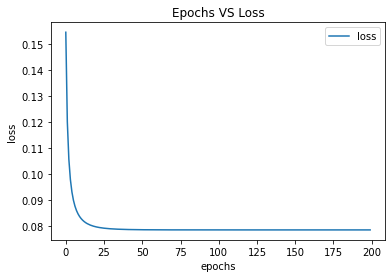

In [116]:
plt.plot(range(epochs),train_loss,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Epochs VS Loss')
plt.legend()
plt.show()

In [117]:
v_test=decision_function(support,aiyi,intercept,X_test,0.001)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [120]:
from sklearn.calibration import CalibratedClassifierCV
calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=3)
calibrated.fit(X_train1,y_train1)

CalibratedClassifierCV(base_estimator=SVC(C=100, gamma=0.001), cv=3)

## Comparing my result with sklearn calibration function

In [118]:
print('Calibrated probabiliies using platt scaling from scratch :',np.around(pred(w,b,v_test[0]),5)[:10])

Calibrated probabiliies using platt scaling from scratch : [0.00286 0.02418 0.00311 0.95563 0.00678 0.01567 0.01159 0.82448 0.19021
 0.22484]


In [121]:
print('Calibrated probabilies using platt scaling using sklearn :',calibrated.predict_proba(X_test).T[1][:10])

Calibrated probabilies using platt scaling using sklearn : [0.00347698 0.02758417 0.00381682 0.94785131 0.0075604  0.01791978
 0.01394319 0.81182303 0.19296722 0.22907582]
